This will be my notebook for conducting Bayesian mixed-effects logistic regression for power.

I made separate notebooks for this bc it takes forever.

In [1]:
import arviz as az
import bambi as bmb
import argparse
from os.path import join
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from Bayesian_model_utils import run_model, plot_res, print_latex_table, plot_predictions

Once I am running models I can do model comparison using: 

https://arviz-devs.github.io/arviz/api/generated/arviz.compare.html
and 
https://arviz-devs.github.io/arviz/api/generated/arviz.plot_compare.html

as in: https://bambinos.github.io/bambi/main/notebooks/model_comparison.html?highlight=waic


In [ ]:
# Model 1: No interaction effect here: 

pow_df = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/final_NHB_power_data_revised.csv', memory_map=True)

# rename the electrodes to properly do the elec random effects 
pow_df.elec = pow_df.apply(lambda x: f'{x.subj}_{x.elec}', axis=1)

# De-mean the valence  
pow_df['valence'] = pow_df['valence'] - 0.5

# Set categorical orders 

cat_type = CategoricalDtype(categories=['right', 'left'], ordered=True)
pow_df.hemi = pow_df.hemi.astype(cat_type)

cat_type = CategoricalDtype(categories=['Amy', 'Hipp'], ordered=True)
pow_df.region = pow_df.region.astype(cat_type)

# Let's do separate models for band

for band in ['theta']:
        
    model_df = pow_df[pow_df.band==band]

    y = 'memory'
    X = ['arousal', 'valence', 'region', 'hemi', 'power'] 
    Intx = ['power:arousal', 
            'power:valence',
            'power:hemi',
            'power:region',
            'power:region:hemi']

    label = (f"{y}" + "_{}"*len(X)).format(*X) + f'_{band}' + 'no_intx'

#             'power:hemi:region:arousal',
#             'power:hemi:region:CV'
    rand_effect = ['subj', 'elec']
    categorical = ['hemi', 'region']

    # Drop nan data
    model_df = model_df.dropna(subset=X)

    run_model(model_df, y, X, Intx, rand_effect, rand_slopes=False, categorical=categorical,
             chains=4, cores=4, tune=500, draws=1000, label=label, save_model_res=True)

/home1/salman.qasim/miniconda3/envs/bambi_env/lib/python3.10/site-packages/bambi/models.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[obj_cols] = data[obj_cols].apply(lambda x: x.astype("category"))
WARNING (theano.link.c.cmodule): ModuleCache.refresh() Found key without dll in cache, deleting it. /home1/salman.qasim/.theano/compiledir_Linux-3.10-el7.x86_64-x86_64-with-glibc2.17-x86_64-3.10.4-64/tmp3gossgda/key.pkl
Modeling the probability that memory==1
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 43900
Interrupted at 43,899 [87%]: Average Loss = 3.522e+05
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [1|elec_offset, 1|elec_sigma, 1|subj_offset, 1|subj_sigma, power:region:hemi, power:region, power:hemi, power:valence, power:arousal, power, hemi, region, valence, arousal, Intercept]


In [ ]:
# Model 4: Examine the effect of HFA power and word features on recall. 
# Note: Since 4/27 I re-ran the power analysis to NOT average each electrode by region and hemisphere
# instead I treat electrode like it's own random effect

# pow_df = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/LM_data_128_30_noIED.csv')
# pow_df = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/LM_data_128_30_ELEC_RESOLVED.csv')
pow_df = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/final_NHB_power_data_revised.csv', memory_map=True)

# rename the electrodes to properly do the elec random effects 
pow_df.elec = pow_df.apply(lambda x: f'{x.subj}_{x.elec}', axis=1)

# De-mean the valence  
pow_df['valence'] = pow_df['valence'] - 0.5

# Set categorical orders 

cat_type = CategoricalDtype(categories=['right', 'left'], ordered=True)
pow_df.hemi = pow_df.hemi.astype(cat_type)

cat_type = CategoricalDtype(categories=['Amy', 'Hipp'], ordered=True)
pow_df.region = pow_df.region.astype(cat_type)

# Let's do separate models for band

for band in ['hfa', 'theta']:
        
    model_df = pow_df[pow_df.band==band]

    y = 'memory'
    X = ['arousal', 'valence', 'region', 'hemi', 'power'] 
    Intx = ['power:arousal', 
            'power:valence',
            'power:hemi',
            'power:region',
            'power:region:hemi',
            'power:arousal:valence']

    label = (f"{y}" + "_{}"*len(X)).format(*X) + f'_{band}' + '_all_elecs' + 'no_soz'

#             'power:hemi:region:arousal',
#             'power:hemi:region:CV'
    rand_effect = ['subj', 'elec']
    categorical = ['hemi', 'region']

    # Drop nan data
    model_df = model_df.dropna(subset=X)

    run_model(model_df, y, X, Intx, rand_effect, rand_slopes=False, categorical=categorical,
             chains=4, cores=4, tune=500, draws=1000, label=label, save_model_res=True)

/home1/salman.qasim/miniconda3/envs/bambi_env/lib/python3.10/site-packages/bambi/models.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[obj_cols] = data[obj_cols].apply(lambda x: x.astype("category"))
Modeling the probability that memory==1
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 45400
Interrupted at 45,399 [90%]: Average Loss = 3.5135e+05
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [1|elec_offset, 1|elec_sigma, 1|subj_offset, 1|subj_sigma, power:arousal:valence, power:region:hemi, power:region, power:hemi, power:valence, power:arousal, power, hemi, region, valence, arousal, Intercept]


In [ ]:
# Model 4: Examine the effect of HFA power and word features on recall. 
# Note: Since 4/27 I re-ran the power analysis to NOT average each electrode by region and hemisphere
# instead I treat electrode like it's own random effect

# pow_df = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/LM_data_128_30_noIED.csv')
# pow_df = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/LM_data_128_30_ELEC_RESOLVED.csv')
pow_df = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/final_NHB_power_data_revised.csv', memory_map=True)

# rename the electrodes to properly do the elec random effects 
pow_df.elec = pow_df.apply(lambda x: f'{x.subj}_{x.elec}', axis=1)

# De-mean the valence  
pow_df['valence'] = pow_df['valence'] - 0.5

# Set categorical orders 

cat_type = CategoricalDtype(categories=['right', 'left'], ordered=True)
pow_df.hemi = pow_df.hemi.astype(cat_type)

cat_type = CategoricalDtype(categories=['Amy', 'Hipp'], ordered=True)
pow_df.region = pow_df.region.astype(cat_type)

# Let's do separate models for band

for band in ['hfa', 'theta']:
        
    model_df = pow_df[pow_df.band==band]

    y = 'memory'
    X = ['arousal', 'valence', 'region', 'hemi', 'power'] 
    Intx = ['power:arousal', 
            'power:valence',
            'power:hemi',
            'power:region',
            'power:region:hemi',
            'power:valence:hemi',
            'power:valence:region', 
            'power:arousal:hemi',
            'power:arousal:region',
            'power:arousal:valence']

    label = (f"{y}" + "_{}"*len(X)).format(*X) + f'_{band}' + '_all_elecs' + 'no_soz'

#             'power:hemi:region:arousal',
#             'power:hemi:region:CV'
    rand_effect = ['subj', 'elec']
    categorical = ['hemi', 'region']

    # Drop nan data
    model_df = model_df.dropna(subset=X)

    run_model(model_df, y, X, Intx, rand_effect, rand_slopes=False, categorical=categorical,
             chains=4, cores=4, tune=500, draws=1000, label=label, save_model_res=True)

/home1/salman.qasim/miniconda3/envs/bambi_env/lib/python3.10/site-packages/bambi/models.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[obj_cols] = data[obj_cols].apply(lambda x: x.astype("category"))
Modeling the probability that memory==1
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


In [3]:
# # Model 4: Examine the effect of HFA power and word features on recall. 
# # Note: Since 4/27 I re-ran the power analysis to NOT average each electrode by region and hemisphere
# # instead I treat electrode like it's own random effect

# # pow_df = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/LM_data_128_30_noIED.csv')
# # pow_df = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/LM_data_128_30_ELEC_RESOLVED.csv')
# pow_df = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/final_NHB_power_data_revised.csv', memory_map=True)
# pow_df = pow_df.drop(columns=['Unnamed: 0'])

# # rename the electrodes to properly do the elec random effects 
# pow_df.elec = pow_df.apply(lambda x: f'{x.subj}_{x.elec}', axis=1)

# # De-mean the valence  
# pow_df['valence_squared'] = (pow_df['valence'] - 0.5)**2

# # Set categorical orders 

# cat_type = CategoricalDtype(categories=['right', 'left'], ordered=True)
# pow_df.hemi = pow_df.hemi.astype(cat_type)

# cat_type = CategoricalDtype(categories=['Amy', 'Hipp'], ordered=True)
# pow_df.region = pow_df.region.astype(cat_type)

# # Let's do separate models for band

# for band in ['theta', 'hfa']:
        
#     model_df = pow_df[pow_df.band==band]

#     y = 'memory'
#     X = ['valence_squared', 'region', 'hemi', 'power'] 
#     Intx = ['power:valence_squared', 
#             'power:hemi',
#             'power:region',
#             'power:region:hemi',
#             'power:valence_squared:hemi',
#             'power:valence_squared:region']

#     label = (f"{y}" + "_{}"*len(X)).format(*X) + f'_{band}' + '_all_elecs' + 'no_soz'

# #             'power:hemi:region:arousal',
# #             'power:hemi:region:CV'
#     rand_effect = ['subj', 'elec']
#     categorical = ['hemi', 'region']

#     # Drop nan data
#     model_df = model_df.dropna(subset=X)

#     run_model(model_df, y, X, Intx, rand_effect, rand_slopes=False, categorical=categorical,
#              chains=4, cores=4, tune=500, draws=1000, label=label, save_model_res=True)

In [62]:
d = data_plot.pivot_table(index='binned_arousal', columns='binned_valence', values='power', aggfunc='mean').fillna(0)
d.values.tolist()
np.array(d.values.tolist()).astype('float')

array([[ 0.        ,  0.        , -0.02993438, -0.00619143,  0.00783802,
         0.00420344,  0.        ],
       [ 0.        , -0.00508998,  0.00846899, -0.00370353,  0.00329889,
         0.00047441,  0.01457817],
       [-0.01982477,  0.05301185,  0.00413871,  0.00749877,  0.01679066,
         0.01144301,  0.01025864],
       [ 0.        , -0.01284794,  0.00642857, -0.00289242,  0.02172741,
         0.01555978,  0.027505  ],
       [ 0.        ,  0.03876198,  0.0259569 ,  0.01218386,  0.0343055 ,
         0.        , -0.00123562],
       [ 0.        ,  0.00355234, -0.05437716, -0.03955116,  0.00557456,
         0.06324334,  0.        ],
       [ 0.05877831,  0.06318333, -0.03304419,  0.        ,  0.        ,
         0.        ,  0.        ]])

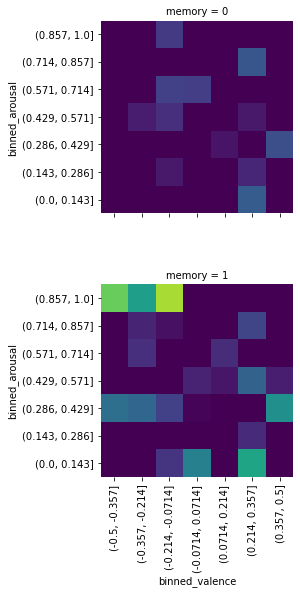

In [2]:
pow_df = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/final_NHB_power_data_revised.csv', memory_map=True)
pow_df = pow_df.drop(columns=['Unnamed: 0'])

# rename the electrodes to properly do the elec random effects 
pow_df.elec = pow_df.apply(lambda x: f'{x.subj}_{x.elec}', axis=1)

# De-mean the valence  
pow_df['valence'] = pow_df['valence'] - 0.5

pow_df['binned_arousal'] = pd.cut(pow_df.arousal, bins=np.linspace(0,1,8))
pow_df['binned_valence'] = pd.cut(pow_df.valence, bins=np.linspace(-0.5,0.5,8))
# temp = pow_df[pow_df.band=='hfa'].pivot_table(values='power', index='CA_ten', columns='CV_ten')
# ax = sns.heatmap(temp, cmap='viridis', vmin=0, vmax=0.05)


def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot_table(index=args[1], columns=args[0], values=args[2], aggfunc='mean').fillna(0)
    sns.heatmap(d, **kwargs)
#     im = plt.imshow(np.array(d.values.tolist()).astype('float'), 
#                     aspect='auto', interpolation='hanning', cmap='viridis')
    plt.gca().invert_yaxis()
    
data_plot = pow_df[(pow_df.band=='hfa')]
fg = sns.FacetGrid(data_plot, row='memory', height=4.5, aspect=.95)
fg.map_dataframe(draw_heatmap, 'binned_valence', 'binned_arousal', 'power', cbar=False, cmap='viridis', vmin=0, vmax=0.1)
# get figure background color
facecolor=plt.gcf().get_facecolor()
for ax in fg.axes.flat:
    # set aspect of all axis
    ax.set_aspect('equal', 'box')
    # set background color of axis instance
    ax.set_facecolor(facecolor)
plt.show()

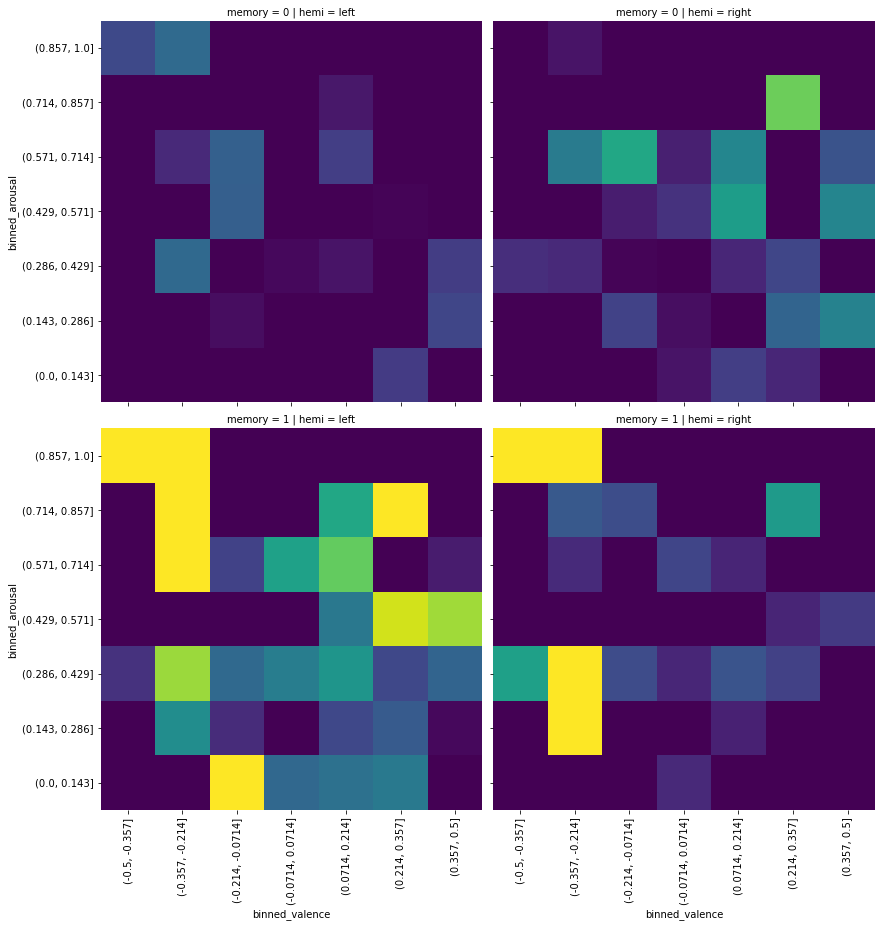

In [77]:

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot_table(index=args[1], columns=args[0], values=args[2], aggfunc='mean').fillna(0)
    sns.heatmap(d, **kwargs)
#     im = plt.imshow(np.array(d.values.tolist()).astype('float'), 
#                     aspect='auto', interpolation='hanning', cmap='viridis')
    plt.gca().invert_yaxis()
    
data_plot = pow_df[(pow_df.band=='hfa')]
fg = sns.FacetGrid(data_plot, row='memory', col='hemi', col_order=['left','right'], height=6.5, aspect=.95)
fg.map_dataframe(draw_heatmap, 'binned_valence', 'binned_arousal', 'power', cbar=False, cmap='viridis', vmin=0, vmax=0.1)
# get figure background color
facecolor=plt.gcf().get_facecolor()
for ax in fg.axes.flat:
    # set aspect of all axis
    ax.set_aspect('equal', 'box')
    # set background color of axis instance
    ax.set_facecolor(facecolor)
plt.show()

In [79]:
# pow_df['binned_arousal'] = pd.cut(pow_df.arousal, bins=np.linspace(0,1,8))
# pow_df['binned_valence'] = pd.cut(pow_df.valence, bins=np.linspace(-0.5,0.5,8))
# # temp = pow_df[pow_df.band=='hfa'].pivot_table(values='power', index='CA_ten', columns='CV_ten')
# # ax = sns.heatmap(temp, cmap='viridis', vmin=0, vmax=0.05)


# def draw_heatmap(*args, **kwargs):
#     data = kwargs.pop('data')
#     d = data.pivot_table(index=args[1], columns=args[0], values=args[2], aggfunc='mean').fillna(0)
#     sns.heatmap(d, **kwargs)
# #     im = plt.imshow(np.array(d.values.tolist()).astype('float'), 
# #                     aspect='auto', interpolation='hanning', cmap='viridis')
#     plt.gca().invert_yaxis()
    
# data_plot = pow_df[(pow_df.band=='hfa')]
# fg = sns.FacetGrid(data_plot, row='memory', col='region', height=6.5, aspect=.95)
# fg.map_dataframe(draw_heatmap, 'binned_valence', 'binned_arousal', 'power', cbar=False, cmap='viridis', vmin=0, vmax=0.1)
# # get figure background color
# facecolor=plt.gcf().get_facecolor()
# for ax in fg.axes.flat:
#     # set aspect of all axis
#     ax.set_aspect('equal', 'box')
#     # set background color of axis instance
#     ax.set_facecolor(facecolor)
# plt.show()

In [ ]:
sns.displot(data=pow_df[(pow_df.region=='Hipp')], x="power", y="valence", hue='memory', kind='kde')


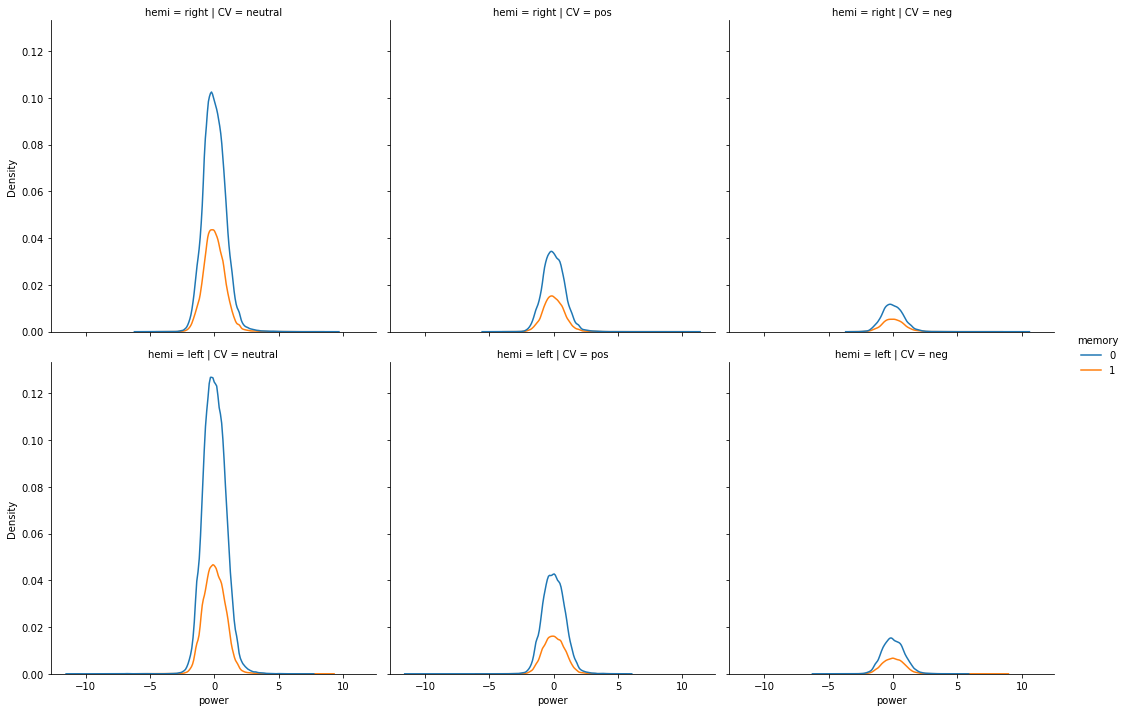

In [195]:
sns.displot(data=pow_df[(pow_df.region=='Hipp') & (np.abs(pow_df.power)<2.5)], x='power', hue='memory', row='hemi', col='CV', kind='kde')


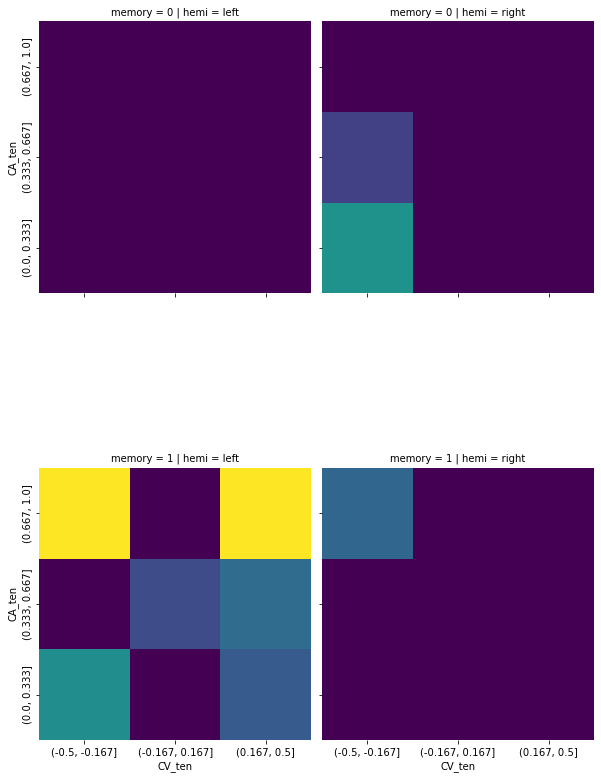

In [173]:
data_plot = pow_df[(pow_df.band=='hfa') & (pow_df.region=='Amy')]
fg = sns.FacetGrid(data_plot, col='hemi', row='memory', col_order=['left', 'right'], height=6.5, aspect=.65)
fg.map_dataframe(draw_heatmap, 'CV_ten', 'CA_ten', 'power', cbar=False, cmap='viridis', vmin=-0.025, vmax=0.05)
# get figure background color
facecolor=plt.gcf().get_facecolor()
for ax in fg.axes.flat:
    # set aspect of all axis
    ax.set_aspect('equal', 'box')
    # set background color of axis instance
    ax.set_facecolor(facecolor)
plt.show()

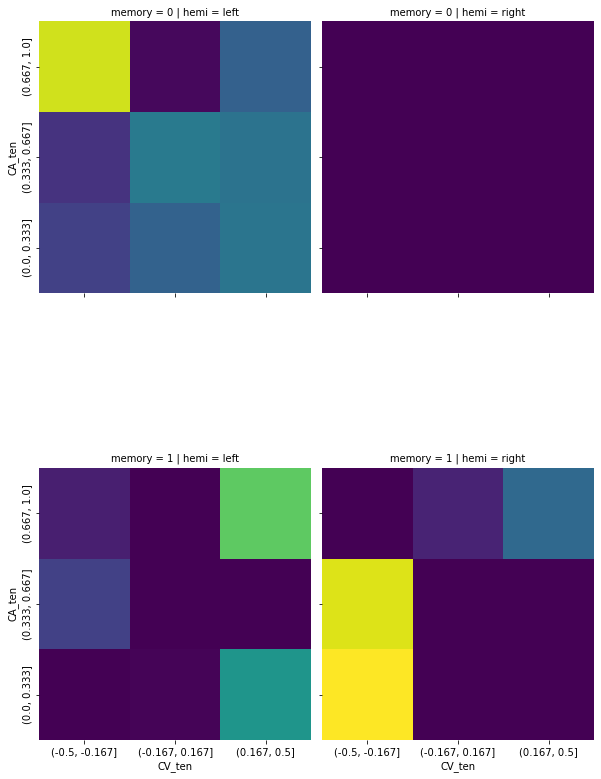

In [175]:
data_plot = pow_df[(pow_df.band=='theta') & (pow_df.region=='Hipp')]
fg = sns.FacetGrid(data_plot, col='hemi', row='memory', col_order=['left', 'right'], height=6.5, aspect=.65)
fg.map_dataframe(draw_heatmap, 'CV_ten', 'CA_ten', 'power', cbar=False, cmap='viridis', vmin=-0.025, vmax=0.05)
# get figure background color
facecolor=plt.gcf().get_facecolor()
for ax in fg.axes.flat:
    # set aspect of all axis
    ax.set_aspect('equal', 'box')
    # set background color of axis instance
    ax.set_facecolor(facecolor)
plt.show()

In [72]:
# # Model 4: Examine the effect of HFA power and word features on recall (binned CV). 

# pow_df = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/LM_data_128_30_noIED.csv')
# pow_df = pow_df.drop(columns=['Unnamed: 0'])

# # Set categorical orders 

# cat_type = CategoricalDtype(categories=['right', 'left'], ordered=True)
# pow_df.hemi = pow_df.hemi.astype(cat_type)

# cat_type = CategoricalDtype(categories=['neutral', 'pos', 'neg'], ordered=True)
# pow_df.CV = pow_df.CV.astype(cat_type)

# # Let's do separate models for band

# for band in ['theta', 'gamma']:
        
#     pow_df = pow_df[pow_df.band==band]

#     # Bin the arousal and valence 
#     bins = np.linspace(0,1,4)
#     pow_df['CA'] = pd.cut(pow_df['arousal'], bins=bins,
#                                                         labels=['low', 'med', 'high'])
#     pow_df['CV'] = pd.cut(pow_df['valence'], bins=bins,
#                                                         labels=['neg', 'neutral', 'pos'])


#     y = 'memory'
#     X = ['arousal', 'CV', 'region', 'power', 'hemi'] 
#     Intx = ['arousal:CV',
#             'power:arousal', 
#             'power:CV',
#             'power:hemi',
#             'power:region',
#             'power:hemi:region',
#             'power:hemi:arousal',
#             'power:hemi:CV',
#             'power:arousal:CV',
#             'power:arousal:region', 
#             'power:CV:region']

#     label = (f"{y}" + "_{}"*len(X)).format(*X) + f'_{band}'

# #             'power:hemi:region:arousal',
# #             'power:hemi:region:CV'

#     rand_effect = 'subj'
#     categorical = ['hemi', 'region', 'CV']

#     # Drop nan data
#     pow_df = pow_df.dropna(subset=X)

#     run_model(pow_df, y, X, Intx, rand_effect, rand_slopes=False, categorical=categorical,
#              chains=4, cores=4, tune=500, draws=1000, label=label)

In [ ]:
# # Model 4 control: Examine the effect of theta power and word features on recall. 
# # Note: this will override HFA results if you don't manually rename it. 

# pow_df = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/LM_data_128_30_noIED.csv')
# pow_df = pow_df.drop(columns=['Unnamed: 0'])

# # Set categorical orders 

# cat_type = CategoricalDtype(categories=['right', 'left'], ordered=True)
# pow_df.hemi = pow_df.hemi.astype(cat_type)

# cat_type = CategoricalDtype(categories=['neutral', 'pos', 'neg'], ordered=True)
# pow_df.CV = pow_df.CV.astype(cat_type)


# for band in ['theta']:
#     pow_df = pow_df[pow_df.band==band]
    
#     # average across electrodes in a region (for speed!)
# #     pow_df = pow_df.groupby(['arousal','valence','subj','region','hemi','memory']).mean().reset_index()

#     # Bin the arousal and valence 
#     bins = np.linspace(0,1,4)
#     pow_df['CA'] = pd.cut(pow_df['arousal'], bins=bins,
#                                                         labels=['low', 'med', 'high'])
#     pow_df['CV'] = pd.cut(pow_df['valence'], bins=bins,
#                                                         labels=['neg', 'neutral', 'pos'])


#     y = 'memory'
#     X = ['arousal', 'CV', 'region', 'power', 'hemi'] 
#     Intx = ['arousal:CV',
#             'power:arousal', 
#             'power:CV',
#             'power:hemi',
#             'power:region',
#             'power:hemi:region',
#             'power:hemi:arousal',
#             'power:hemi:CV',
#             'power:arousal:CV',
#             'power:arousal:region', 
#             'power:CV:region']
    
# #             'power:hemi:region:arousal',
# #             'power:hemi:region:CV'

#     rand_effect = 'subj'
#     categorical = ['hemi', 'region', 'CV']

#     # Drop nan data
#     pow_df = pow_df.dropna(subset=X)

#     run_model(pow_df, y, X, Intx, rand_effect, rand_slopes=False, categorical=categorical,
#              chains=4, cores=4, tune=500, draws=1000)

Run tonight 4/14:

In [ ]:
# Model 4 control 2: Examine the effect of HFA power and word features on recall, plus hipp AP position  

pow_df = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/final_NHB_power_data_revised.csv', memory_map=True)

# rename the electrodes to properly do the elec random effects 
pow_df.elec = pow_df.apply(lambda x: f'{x.subj}_{x.elec}', axis=1)

# De-mean the valence  
pow_df['valence'] = pow_df['valence'] - 0.5

# Set categorical orders 

cat_type = CategoricalDtype(categories=['right', 'left'], ordered=True)
pow_df.hemi = pow_df.hemi.astype(cat_type)

cat_type = CategoricalDtype(categories=['Amy', 'Hipp'], ordered=True)
pow_df.region = pow_df.region.astype(cat_type)


# Restrict this to gamma 
pow_df = pow_df[pow_df.band=='hfa']

# Restrict this to hippocampus
pow_df = pow_df[pow_df.region=='Hipp']

# Bin longitudinal position
APbins = [-50, -20, 10]
pow_df['longitudinal_bin' ] = np.nan
pow_df['longitudinal_bin'] = pd.cut(pow_df['y_coord'], 
                                            bins=APbins, 
                                            labels=['posterior', 'anterior'])

cat_type = CategoricalDtype(categories=['posterior', 'anterior'], ordered=True)
pow_df.longitudinal_bin = pow_df.longitudinal_bin.astype(cat_type)


pow_df = pow_df.dropna(subset=['arousal', 'valence', 'region', 'power', 'hemi', 'y_coord'])


y = 'memory'
X = ['arousal', 'valence', 'y_coord', 'power', 'hemi'] 

Intx = ['power:arousal', 
        'power:valence',
        'power:hemi',
        'power:y_coord',
        'power:y_coord:hemi',
        'power:arousal:valence',
        'power:arousal:y_coord', 
        'power:valence:y_coord']

rand_effect = ['subj', 'elec']
categorical = ['hemi']

# Drop nan data
pow_df = pow_df.dropna(subset=X)

band='hfa'
label = (f"{y}" + "_{}"*len(X)).format(*X) + f'_{band}' + '_all_elecs' + 'no_soz'

run_model(pow_df, y, X, Intx, rand_effect, rand_slopes=False, categorical=categorical,
         chains=4, cores=4, tune=1000, draws=1000, label=label, save_model_res=True)

/home1/salman.qasim/miniconda3/envs/bambi_env/lib/python3.10/site-packages/bambi/models.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[obj_cols] = data[obj_cols].apply(lambda x: x.astype("category"))
Modeling the probability that memory==1
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


In [2]:
# Model 4 control 2: Examine the effect of HFA power and word features on recall, plus hipp AP position  

pow_df = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/final_NHB_power_data_revised.csv', memory_map=True)

# rename the electrodes to properly do the elec random effects 
pow_df.elec = pow_df.apply(lambda x: f'{x.subj}_{x.elec}', axis=1)

# De-mean the valence  
pow_df['valence'] = pow_df['valence'] - 0.5

# Set categorical orders 

cat_type = CategoricalDtype(categories=['right', 'left'], ordered=True)
pow_df.hemi = pow_df.hemi.astype(cat_type)

cat_type = CategoricalDtype(categories=['Amy', 'Hipp'], ordered=True)
pow_df.region = pow_df.region.astype(cat_type)


# Restrict this to gamma 
pow_df = pow_df[pow_df.band=='hfa']

# Restrict this to hippocampus
pow_df = pow_df[pow_df.region=='Hipp']

# Bin longitudinal position
APbins = [-50, -20, 10]
pow_df['longitudinal_bin' ] = np.nan
pow_df['longitudinal_bin'] = pd.cut(pow_df['y_coord'], 
                                            bins=APbins, 
                                            labels=['posterior', 'anterior'])

cat_type = CategoricalDtype(categories=['posterior', 'anterior'], ordered=True)
pow_df.longitudinal_bin = pow_df.longitudinal_bin.astype(cat_type)


pow_df = pow_df.dropna(subset=['arousal', 'valence', 'region', 'power', 'hemi', 'longitudinal_bin'])


y = 'memory'
X = ['arousal', 'valence', 'longitudinal_bin', 'power', 'hemi'] 

Intx = ['power:arousal', 
        'power:valence',
        'power:hemi',
        'power:longitudinal_bin',
        'power:longitudinal_bin:hemi',
        'power:arousal:valence',
        'power:arousal:longitudinal_bin', 
        'power:valence:longitudinal_bin']

rand_effect = ['subj', 'elec']
categorical = ['hemi', 'longitudinal_bin']

# Drop nan data
pow_df = pow_df.dropna(subset=X)

band='hfa'
label = (f"{y}" + "_{}"*len(X)).format(*X) + f'_{band}' + '_all_elecs' + 'no_soz'

run_model(pow_df, y, X, Intx, rand_effect, rand_slopes=False, categorical=categorical,
         chains=4, cores=4, tune=1000, draws=1000, label=label, save_model_res=True)

/home1/salman.qasim/miniconda3/envs/bambi_env/lib/python3.10/site-packages/bambi/models.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[obj_cols] = data[obj_cols].apply(lambda x: x.astype("category"))

KeyboardInterrupt



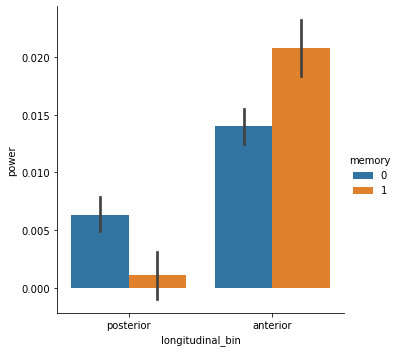

In [6]:
sns.catplot(data=pow_df, x='longitudinal_bin', hue='memory', y='power', kind='bar', ci=68) 

Below you will find our one and only Bayesian linear mixed-effects model

In [71]:
# Model 5: effect of stimulation on post-pre HFA and also every other power band. 

# run separate models for stimulation 

stim_t_test_data = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/FR2_stim_allbands_diff_newfilt_600ms_50buff_hfa.csv')
stim_t_test_data = stim_t_test_data.drop(columns=['Unnamed: 0'])

# replace the non-stim data with the word 2 stim data only
non_stim_path = '/home1/salman.qasim/Salman_Project/FR_Emotion/FR2_nostim_allbands_diff_newfilt_600ms_50buff_stimOFf_only.csv'

# Set categorical orders 

cat_type = CategoricalDtype(categories=['MTL', 'Amy', 'Hipp'], ordered=True)
stim_t_test_data.stim_reg = stim_t_test_data.stim_reg.astype(cat_type)

cat_type = CategoricalDtype(categories=['MTL', 'Amy', 'Hipp'], ordered=True)
stim_t_test_data.rec_reg = stim_t_test_data.rec_reg.astype(cat_type)

cat_type = CategoricalDtype(categories=['MTL', 'Amy', 'Hipp'], ordered=True)
stim_t_test_data.rec_reg = stim_t_test_data.rec_reg.astype(cat_type)

cat_type = CategoricalDtype(categories=['right', 'left'], ordered=True)
stim_t_test_data.stim_hemi = stim_t_test_data.stim_hemi.astype(cat_type)

cat_type = CategoricalDtype(categories=['right', 'left'], ordered=True)
stim_t_test_data.rec_hemi = stim_t_test_data.rec_hemi.astype(cat_type)



for sr in ['Amy']:
    for rr in ['Amy']:
        for y in ['hfa_diff']:
            model_df = stim_t_test_data[(stim_t_test_data.stim_reg==sr)]
            model_df = model_df[(model_df.rec_reg==rr)]

            X = ['stim', 'stim_hemi'] 
            Intx = ['stim',
                    'stim:stim_hemi']

            label = (f"{y}" + "_{}"*len(X)).format(*X)+f'stim_{sr}_rec{rr}'

            # y = 'beta_diff'
            # X = ['stim', 'stim_reg', 'rec_reg', 'stim_hemi', 'rec_hemi'] 
            # Intx = ['stim:stim_reg',
            #         'stim:stim_hemi', 
            #         'stim:stim_reg:rec_reg',
            #         'stim:stim_hemi:rec_hemi']

            rand_effect = 'sub'
            categorical = X

            # Drop nan data
            model_df = model_df.dropna()

            model, results = run_model(model_df, y, X, Intx, rand_effect, rand_slopes=False, categorical=categorical,
                     chains=4, cores=4, tune=1000, draws=1500, target_accept=0.95, model_fam='gaussian', return_model=True, label = label)



/home1/salman.qasim/miniconda3/envs/bambi_env/lib/python3.10/site-packages/bambi/models.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[obj_cols] = data[obj_cols].apply(lambda x: x.astype("category"))
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [hfa_diff_sigma, 1|sub_offset, 1|sub_sigma, stim:stim_hemi, stim_hemi, stim, Intercept]


Sampling 4 chains for 1_000 tune and 1_500 draw iterations (4_000 + 6_000 draws total) took 41 seconds.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
There were 30 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
/tmp/2765880.1.jupyter.q/ipykernel_60460/1434725164.py:99: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_df.reset_index().to_latex(index=False,


\begin{tabular}{|c|c|c|c|c|}
\toprule
                    index &   mean &    sd &  hdi\_2.5\% &  hdi\_97.5\% \\ \hline
\midrule
                stim[1.0] & -0.030 & 0.037 &    -0.110 &      0.041 \\ \hline
          stim\_hemi[left] &  0.008 & 0.097 &    -0.185 &      0.228 \\ \hline
stim:stim\_hemi[1.0, left] & -0.006 & 0.041 &    -0.090 &      0.074 \\ \hline
          stim\_hemi[left] &  0.008 & 0.097 &    -0.185 &      0.228 \\ \hline
stim:stim\_hemi[1.0, left] & -0.006 & 0.041 &    -0.090 &      0.074 \\ \hline
\bottomrule
\end{tabular}



In [35]:
stim_t_test_data

,alpha_diff,beta_diff,elec_num,hfa_diff,hgamma_diff,lgamma_diff,rec_hemi,rec_reg,stim,stim_avgy,stim_elec,stim_hemi,stim_reg,subj,theta_diff,elec
0,-0.072325,0.009788,0.0,0.008877,0.006514,0.011240,left,Hipp,0.0,-16.805,"('LDA3', 'LDA4')",left,Hipp,R1001P,0.005822,"R1001P_('LDA3', 'LDA4')"
1,-0.036284,-0.057136,0.0,-0.004297,0.007882,-0.016476,left,Hipp,1.0,-16.805,"('LDA3', 'LDA4')",left,Hipp,R1001P,0.017252,"R1001P_('LDA3', 'LDA4')"
2,0.035702,0.005883,1.0,0.002156,-0.002683,0.006996,left,Hipp,0.0,-16.805,"('LDA3', 'LDA4')",left,Hipp,R1001P,0.000365,"R1001P_('LDA3', 'LDA4')"
3,-0.014147,-0.031966,1.0,-0.014607,-0.013054,-0.016160,left,Hipp,1.0,-16.805,"('LDA3', 'LDA4')",left,Hipp,R1001P,-0.002982,"R1001P_('LDA3', 'LDA4')"
4,0.010145,0.037615,2.0,0.029011,0.029621,0.028401,left,Hipp,0.0,-16.805,"('LDA3', 'LDA4')",left,Hipp,R1001P,-0.002812,"R1001P_('LDA3', 'LDA4')"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,-0.008609,-0.046080,2.0,0.000111,0.014562,-0.014339,right,MTL,1.0,-22.910,"('HH1', 'HH2')",right,Hipp,R1157C,0.025030,"R1157C_('HH1', 'HH2')"
408,-0.006566,-0.000903,3.0,0.013329,0.000865,0.025794,right,MTL,0.0,-22.910,"('HH1', 'HH2')",right,Hipp,R1157C,-0.005692,"R1157C_('HH1', 'HH2')"
409,-0.126023,-0.041508,3.0,-0.011803,0.008838,-0.032443,right,MTL,1.0,-22.910,"('HH1', 'HH2')",right,Hipp,R1157C,0.030860,"R1157C_('HH1', 'HH2')"
410,0.001220,0.009343,0.0,0.013285,0.031738,-0.005168,left,Hipp,0.0,-25.555,"('LHC1', 'LHC2')",left,Hipp,R1192C,0.003266,"R1192C_('LHC1', 'LHC2')"


In [42]:
# Model 5: effect of stimulation on post-pre HFA and also every other power band. 

# run separate models for stimulation 

stim_t_test_data = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/FR2_stim_allbands_diff_newfilt_600ms_50buff_1f_elec.csv')
stim_t_test_data = stim_t_test_data.drop(columns=['Unnamed: 0'])
stim_t_test_data.rename(columns={'sub':'subj'}, inplace=True)
stim_t_test_data['elec'] = np.nan
stim_t_test_data['elec'] = stim_t_test_data.apply(lambda x: f'{x.subj}_{x.stim_elec}', axis=1)

# Set categorical orders 

cat_type = CategoricalDtype(categories=['MTL', 'Amy', 'Hipp'], ordered=True)
stim_t_test_data.stim_reg = stim_t_test_data.stim_reg.astype(cat_type)

cat_type = CategoricalDtype(categories=['MTL', 'Amy', 'Hipp'], ordered=True)
stim_t_test_data.rec_reg = stim_t_test_data.rec_reg.astype(cat_type)

cat_type = CategoricalDtype(categories=['MTL', 'Amy', 'Hipp'], ordered=True)
stim_t_test_data.rec_reg = stim_t_test_data.rec_reg.astype(cat_type)

cat_type = CategoricalDtype(categories=['right', 'left'], ordered=True)
stim_t_test_data.stim_hemi = stim_t_test_data.stim_hemi.astype(cat_type)

cat_type = CategoricalDtype(categories=['right', 'left'], ordered=True)
stim_t_test_data.rec_hemi = stim_t_test_data.rec_hemi.astype(cat_type)



for sr in ['MTL', 'Hipp']:
    for rr in ['Hipp']:
        for y in ['hfa_diff']:

            model_df = stim_t_test_data[(stim_t_test_data.stim_reg==sr)]
            model_df = model_df[((model_df.rec_reg==rr))]

            X = ['stim', 'stim_hemi'] 
            Intx = ['stim',
                    'stim:stim_hemi']

            label = (f"{y}" + "_{}"*len(X)).format(*X)+f'stim_{sr}_rec{rr}'+'_elec_level'

            # y = 'beta_diff'
            # X = ['stim', 'stim_reg', 'rec_reg', 'stim_hemi', 'rec_hemi'] 
            # Intx = ['stim:stim_reg',
            #         'stim:stim_hemi', 
            #         'stim:stim_reg:rec_reg',
            #         'stim:stim_hemi:rec_hemi']

            rand_effect = ['subj', 'elec']
            categorical = X

            # Drop nan data
            model_df = model_df.dropna()

            model, results = run_model(model_df, y, X, Intx, rand_effect, rand_slopes=False, categorical=categorical,
                     chains=4, cores=4, tune=2500, draws=1000, target_accept=0.993, model_fam='gaussian', return_model=True, label = label)



/home1/salman.qasim/miniconda3/envs/bambi_env/lib/python3.10/site-packages/bambi/models.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[obj_cols] = data[obj_cols].apply(lambda x: x.astype("category"))
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [hfa_diff_sigma, 1|elec_offset, 1|elec_sigma, 1|subj_offset, 1|subj_sigma, stim:stim_hemi, stim_hemi, stim, Intercept]


Sampling 4 chains for 2_500 tune and 1_000 draw iterations (10_000 + 4_000 draws total) took 70 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
/tmp/2771174.1.jupyter.q/ipykernel_667/1988870754.py:112: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_df.reset_index().to_latex(index=False,
/home1/salman.qasim/miniconda3/envs/bambi_env/lib/python3.10/site-packages/bambi/models.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[obj

\begin{tabular}{|c|c|c|c|c|}
\toprule
                    index &   mean &    sd &  hdi\_2.5\% &  hdi\_97.5\% \\ \hline
\midrule
                stim[1.0] & -0.018 & 0.007 &    -0.031 &     -0.004 \\ \hline
          stim\_hemi[left] & -0.009 & 0.013 &    -0.035 &      0.015 \\ \hline
stim:stim\_hemi[1.0, left] &  0.016 & 0.009 &    -0.003 &      0.034 \\ \hline
          stim\_hemi[left] & -0.009 & 0.013 &    -0.035 &      0.015 \\ \hline
stim:stim\_hemi[1.0, left] &  0.016 & 0.009 &    -0.003 &      0.034 \\ \hline
\bottomrule
\end{tabular}



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [hfa_diff_sigma, 1|elec_offset, 1|elec_sigma, 1|subj_offset, 1|subj_sigma, stim:stim_hemi, stim_hemi, stim, Intercept]


Sampling 4 chains for 2_500 tune and 1_000 draw iterations (10_000 + 4_000 draws total) took 43 seconds.
/tmp/2771174.1.jupyter.q/ipykernel_667/1988870754.py:112: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_df.reset_index().to_latex(index=False,


\begin{tabular}{|c|c|c|c|c|}
\toprule
                    index &   mean &    sd &  hdi\_2.5\% &  hdi\_97.5\% \\ \hline
\midrule
                stim[1.0] & -0.106 & 0.044 &    -0.191 &     -0.020 \\ \hline
          stim\_hemi[left] &  0.003 & 0.046 &    -0.089 &      0.091 \\ \hline
stim:stim\_hemi[1.0, left] &  0.024 & 0.059 &    -0.083 &      0.144 \\ \hline
          stim\_hemi[left] &  0.003 & 0.046 &    -0.089 &      0.091 \\ \hline
stim:stim\_hemi[1.0, left] &  0.024 & 0.059 &    -0.083 &      0.144 \\ \hline
\bottomrule
\end{tabular}



In [30]:
sr = 'MTL'
rr= 'Hipp'
model_df = stim_t_test_data[(stim_t_test_data.stim_reg==sr)]
model_df = model_df[(model_df.rec_reg==rr) | (model_df.rec_reg=='Amy')]


In [31]:
model_df

,alpha_diff,beta_diff,elec_num,hfa_diff,hgamma_diff,lgamma_diff,rec_hemi,rec_reg,stim,stim_avgy,stim_elec,stim_hemi,stim_reg,subj,theta_diff,elec
162,0.001524,-0.148445,0.0,-0.012484,0.096387,-0.121355,left,Hipp,0.0,-16.450,"('LB2', 'LB3')",left,MTL,R1027J,0.042002,"R1027J_('LB2', 'LB3')"
163,NaN,NaN,0.0,NaN,NaN,NaN,left,Hipp,1.0,-16.450,"('LB2', 'LB3')",left,MTL,R1027J,NaN,"R1027J_('LB2', 'LB3')"
164,0.006402,0.018446,1.0,0.004028,0.002725,0.005331,left,Hipp,0.0,-16.450,"('LB2', 'LB3')",left,MTL,R1027J,-0.000223,"R1027J_('LB2', 'LB3')"
165,0.065569,-0.021388,1.0,-0.010719,-0.018781,-0.002658,left,Hipp,1.0,-16.450,"('LB2', 'LB3')",left,MTL,R1027J,-0.008240,"R1027J_('LB2', 'LB3')"
166,-0.019729,0.025132,0.0,-0.002261,-0.014159,0.009638,left,Amy,0.0,-16.450,"('LB2', 'LB3')",left,MTL,R1027J,0.007205,"R1027J_('LB2', 'LB3')"
167,0.001083,0.007549,0.0,-0.014587,-0.031349,0.002176,left,Amy,1.0,-16.450,"('LB2', 'LB3')",left,MTL,R1027J,0.004483,"R1027J_('LB2', 'LB3')"
168,0.009384,0.002025,1.0,0.003694,0.004778,0.002610,left,Amy,0.0,-16.450,"('LB2', 'LB3')",left,MTL,R1027J,0.000550,"R1027J_('LB2', 'LB3')"
169,0.022605,0.055793,1.0,-0.031935,-0.064869,0.001000,left,Amy,1.0,-16.450,"('LB2', 'LB3')",left,MTL,R1027J,-0.010794,"R1027J_('LB2', 'LB3')"
170,0.020466,0.009086,2.0,-0.001646,-0.008387,0.005094,left,Amy,0.0,-16.450,"('LB2', 'LB3')",left,MTL,R1027J,0.012791,"R1027J_('LB2', 'LB3')"
171,-0.010342,0.015988,2.0,-0.018126,-0.026891,-0.009361,left,Amy,1.0,-16.450,"('LB2', 'LB3')",left,MTL,R1027J,-0.004766,"R1027J_('LB2', 'LB3')"


In [28]:
# # Load all the stim models to see what best explains recall performance: 
# X = ['stim', 'stim_hemi'] 
# Intx = ['stim',
#         'stim:stim_hemi']
# # Load each model
# models = {}
# for sr in ['Hipp']:
#     for rr in ['Hipp']:
#         for y in ['theta_diff', 'alpha_diff', 'beta_diff', 'hfa_diff']:
#             label = (f"{y}" + "_{}"*len(X)).format(*X)+f'stim_{sr}_rec{rr}_model'
#             models[f'{y}_stim_{sr}_rec{rr}'] =  az.from_netcdf(f'/home1/salman.qasim/Salman_Project/FR_Emotion/BayesModels/{label}')
        
# df_compare = az.compare(models, ic='loo')
# plot_df = df_compare.reset_index().rename(columns={'index':'model'})[['model', 'loo']]

# c_string = '|c'*plot_df.shape[1] + '|'
# print(plot_df.to_latex(index=False, 
#                                         column_format=c_string).replace("\\\n", "\\ \hline\n"))  


In [ ]:
# # Some data wrangling for easy plotting:

# # rename cols
# stim_t_test_data.rename(columns={'theta_diff': 'theta',
#                                 'alpha_diff': 'alpha',
#                                 'beta_diff': 'beta', 
#                                 'lgamma_diff': 'lgamma', 
#                                 'hgamma_diff': 'hgamma',
#                                 'hfa_diff': 'hfa'}, inplace=True)
# # melt df
# stim_t_test_data = pd.melt(stim_t_test_data,
#         id_vars=['sub', 'stim', 'stim_hemi', 'stim_reg', 'rec_reg', 'rec_hemi'], 
#         value_vars=['theta', 'alpha', 'beta', 'lgamma', 'hgamma', 'hfa']).rename(columns={'variable':'band'})
# # plot
# sns.catplot(data=stim_t_test_data, row_order=['Hipp', 'MTL', 'Amy'],
#             x='band', 
#             y='value', 
#             hue='stim',
#             col='rec_reg',
#             row='stim_reg', 
#             kind = 'point', 
#             ci=68)

# sns.catplot(data=stim_t_test_data, row_order=['Hipp', 'MTL', 'Amy'],
#             x='band', 
#             y='value', 
#             hue='stim',
#             col='rec_reg',
#             row='stim_reg', 
#             kind = 'point', 
#             ci=68)
# plt.savefig('/home1/salman.qasim/Salman_Project/FR_Emotion/Plots/effect_of_stim_allfreqs.pdf')

In [ ]:
# Code for plotting posterior predictive 

# model.predict(results, kind="pps")
# az.plot_ppc(results)

In [27]:
# Code for saving and loading models

# az.to_netcdf(results, '/home1/salman.qasim/Salman_Project/FR_Emotion/BayesModels/test_save')
# az.from_netcdf('/home1/salman.qasim/Salman_Project/FR_Emotion/BayesModels/test_save')

Run tonight (4/14): 

In [ ]:
# # Model 4: Examine the effect of HFA power and word features on recall. 
# # Note: Since 4/27 I re-ran the power analysis to NOT average each electrode by region and hemisphere
# # instead I treat electrode like it's own random effect

# # pow_df = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/LM_data_128_30_noIED.csv')
# pow_df = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/LM_data_128_30_ELEC_RESOLVED.csv')
# pow_df = pow_df.drop(columns=['Unnamed: 0'])

# # rename the electrodes to properly do the elec random effects 
# pow_df.elec = pow_df.apply(lambda x: f'{x.subj}_{x.elec}', axis=1)

# # # average across electrodes in a region(subj/region/hemi/ybin) but keep words (arousal/valence/memory) (for speed!)
# # pow_df = pow_df.groupby(['arousal','valence','subj','region','hemi', 'memory', 'band']).mean().reset_index()

# # De-mean the valence  
# pow_df['valence'] = pow_df['valence'] - pow_df['valence'].mean()

# # Set categorical orders 

# cat_type = CategoricalDtype(categories=['right', 'left'], ordered=True)
# pow_df.hemi = pow_df.hemi.astype(cat_type)

# # Let's do separate models for band

# for band in ['hfa', 'theta']:
        
#     pow_df = pow_df[pow_df.band==band]

#     y = 'memory'
#     X = ['arousal', 'valence', 'region', 'power', 'hemi'] 
#     Intx = ['arousal:valence',
#             'power:arousal', 
#             'power:valence',
#             'power:hemi',
#             'power:region',
#             'power:region:hemi',
#             'power:arousal:hemi',
#             'power:valence:hemi',
#             'power:arousal:valence',
#             'power:arousal:region', 
#             'power:valence:region']

#     label = (f"{y}" + "_{}"*len(X)).format(*X) + f'_{band}' + 'elec_rand_effect'

# #             'power:hemi:region:arousal',
# #             'power:hemi:region:CV'
#     rand_effect = ['subj', 'elec']
#     categorical = ['hemi', 'region']

#     # Drop nan data
#     pow_df = pow_df.dropna(subset=X)

#     run_model(pow_df, y, X, Intx, rand_effect, rand_slopes=False, categorical=categorical,
#              chains=4, cores=4, tune=500, draws=1500, label=label, save_model_res=False)

In [ ]:
# # Model 6: Effect of depression and power and arousal on memory and binned valence

# BeckScores = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/Beck_Scores.csv')
# BeckScores.rename(columns={'Subject Code':'subj'}, inplace=True)
# BeckScores = BeckScores.drop(columns=['Unnamed: 0'])

# pow_df_depr = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/LM_data_128_30_ELEC_RESOLVED.csv')
# pow_df_depr = pow_df_depr.drop(columns=['Unnamed: 0'])
# pow_df_depr = pow_df_depr.merge(BeckScores, on='subj')


# # rename the electrodes to properly do the elec random effects 
# pow_df_depr.elec = pow_df_depr.apply(lambda x: f'{x.subj}_{x.elec}', axis=1)

# # Bin the BDI scores (this is ok because of clinical classification). 
# pow_df_depr['CBDI'] = pd.qcut(pow_df_depr['BDI'], q=3,
#                                                     labels=['low', 'med', 'high'])

# # Should I get rid of the neutral CBDI? Not in the original analysis.... 
# pow_df_depr = pow_df_depr[pow_df_depr['CBDI']!='med']

# pow_df_depr['valence'] = pow_df_depr['valence'] - pow_df_depr['valence'].mean()

# # bins = np.linspace(0,1,4)

# # pow_df_depr['CV'] = pd.cut(pow_df_depr['valence'], bins=bins,
# #                                                     labels=['neg', 'neutral', 'pos'])

# # Set categorical orders 
# # cat_type = CategoricalDtype(categories=['pos', 'neutral', 'neg'], ordered=True)
# # pow_df_depr.CV = pow_df_depr.CV.astype(cat_type)

# # Don't split by hemisphere - 
# cat_type = CategoricalDtype(categories=['Amy', 'Hipp'], ordered=True)
# pow_df_depr.region = pow_df_depr.region.astype(cat_type)
# cat_type = CategoricalDtype(categories=['low', 'high'], ordered=True)
# pow_df_depr.CBDI = pow_df_depr.CBDI.astype(cat_type)
# cat_type = CategoricalDtype(categories=['right', 'left'], ordered=True)
# pow_df_depr.hemi = pow_df_depr.hemi.astype(cat_type)

# for depr in ['high', 'low']: # low 
#     for band in ['hfa', 'theta']: # theta 
            
#         model_df = pow_df_depr[pow_df_depr.CBDI==depr]
#         model_df = model_df[model_df.band==band]
        
#         y = 'memory'
#         X = ['arousal', 'valence', 'power', 'hemi', 'region'] 
#         Intx = ['power:arousal', 
#                 'power:valence',
#                 'power:hemi',
#                 'power:region']
#         # Take region:hemi out because there is not enough sampling to do this 
        

# #             Intx = ['power:arousal',
# #                     'power:CV']

#         rand_effect = ['subj', 'elec']
#         categorical = ['hemi', 'region']

#         # Drop nan data
#         model_df = model_df.dropna(subset=X)
#         label = (f"{y}" + "_{}"*len(X)).format(*X) + f'_{band}' + '_elec_rand_effect'+ f'{depr}_BDI'+'no_threeway'

#         run_model(model_df, y, X, Intx, rand_effect, rand_slopes=False, categorical=categorical,
#                  chains=4, cores=4, tune=1000, draws=1000, target_accept=0.8, label=label)
            
            

/home1/salman.qasim/miniconda3/envs/bambi_env/lib/python3.10/site-packages/bambi/models.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[obj_cols] = data[obj_cols].apply(lambda x: x.astype("category"))
Modeling the probability that memory==1
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [1|elec_offset, 1|elec_sigma, 1|subj_offset, 1|subj_sigma, power:region, power:hemi, power:valence, power:arousal, region, hemi, power, valence, arousal, Intercept]


In [ ]:
print('done')

In [ ]:
# Model 6: Effect of depression and power and arousal on memory and linear valence

# BeckScores = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/Beck_Scores.csv')
# BeckScores.rename(columns={'Subject Code':'subj'}, inplace=True)
# BeckScores = BeckScores.drop(columns=['Unnamed: 0'])
# pow_df_depr = pd.read_csv('/home1/salman.qasim/Salman_Project/FR_Emotion/LM_data_128_30_noIED.csv')
# pow_df_depr = pow_df_depr.drop(columns=['Unnamed: 0'])
# pow_df_depr = pow_df_depr.merge(BeckScores, on='subj')

# for band in ['gamma']:
#     pow_df_depr = pow_df_depr[pow_df_depr.band==band]
        
#     # Set up squared valence 
#     pow_df_depr['valence'] = pow_df_depr['valence'] - pow_df_depr['valence'].mean()
# #     pow_df_depr['valence_squared'] = pow_df_depr['valence']**2
    
#     # Bin the BDI scores (this is ok because of clinical classification). 
#     pow_df_depr['CBDI'] = pd.qcut(pow_df_depr['BDI'], q=3,
#                                                         labels=['low', 'med', 'high'])
#     cat_type = CategoricalDtype(categories=['Amy', 'Hipp'], ordered=True)
#     pow_df_depr.region = pow_df_depr.region.astype(cat_type)
    
#     # Should I get rid of the neutral CBDI? Not in the original analysis.... 
#     pow_df_depr = pow_df_depr[pow_df_depr['CBDI']!='med']


#     cat_type = CategoricalDtype(categories=['low', 'high'], ordered=True)
#     pow_df_depr.CBDI = pow_df_depr.CBDI.astype(cat_type)


#     y = 'memory'
#     X = ['arousal', 'valence', 'region', 'power', 'CBDI'] 
#     Intx = ['power:arousal', 
#             'power:valence',
#             'power:CBDI',
#             'power:region',
#             'power:CBDI:valence',
#             'power:CBDI:arousal',
#             'power:CBDI:region',
#             'power:CBDI:region:arousal',
#             'power:CBDI:region:valence']
    
# #             'power:hemi:region:arousal',
# #             'power:hemi:region:CV'

#     rand_effect = 'subj'
#     categorical = ['CBDI', 'region']

#     # Drop nan data
#     pow_df_depr = pow_df_depr.dropna(subset=X)

#     run_model(pow_df_depr, y, X, Intx, rand_effect, rand_slopes=False, categorical=categorical,
#              chains=4, cores=4, tune=500, draws=1000)

In [13]:
# save out the HDI plot of all the fixed effects
band='gamma'
output_dir = '/home1/salman.qasim/Salman_Project/FR_Emotion/BayesModels'
for region in ['Hipp', 'Amy']: 
    for depr in ['low', 'high']: 
        y = 'memory'
        X = ['arousal', 'CV', 'power'] 
        label = (f"{y}" + "_{}"*len(X)).format(*X) + region + band + f'{depr}_BDI'
        results = az.from_netcdf(f'{output_dir}/{label}_model')
        axes = az.plot_forest(results,
                               kind='ridgeplot',
                               var_names=[f'^{x}' for x in X],
                               filter_vars="regex",
                               colors='lightgray',
                               combined=True,
                               hdi_prob=0.95,
                               figsize=(9, 7))
        plt.vlines(0, plt.ylim()[0], plt.ylim()[1], color = 'black')
        plt.xlim([-0.4, 0.4])
        plt.savefig(join(output_dir, f'{label}_HDIplot.pdf'), dpi=300)
        plt.close()